<a href="https://colab.research.google.com/github/Jeffrowetull/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
#loading data, please standby.....
haberman_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data


In [65]:
import pandas as pd
#Informative feature names
names = ['age', 'op year', 'nodes', 'survived' ] 
haberman_data = pd.read_csv(haberman_data_url, header=None, names = names)
hd = haberman_data #Shortening the name because it's tedious
haberman_data.shape #(306, 4) Correct number of observations
haberman_data.isnull().sum() #No null values
haberman_data['survived'].replace(2,0, inplace = True) #Replace the twos with zeros
haberman_data.head()



,age,op year,nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [83]:
hd.describe()

,age,op year,nodes,survived
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [97]:
# Crosstab of survival against age
age_bins = pd.cut(hd['age'], 10)
pd.crosstab(hd['survived'],age_bins, normalize = 'columns')
# No apparent correlation between age and survival

op year,58,59,60,61,62,63,64,65,66,67,68,69
survived,,,,,,,,,,,,
0,12,9,4,3,7,8,8,13,6,4,3,4
1,24,18,24,23,16,22,23,15,22,21,10,7


In [98]:
# How about nodes and survival
node_bins = pd.cut(hd['nodes'],10)
pd.crosstab(hd['survived'], node_bins)
# Other than the majority of people had less than 5.2 nodes, 
# I don't see anything terribly important

nodes,"(-0.052, 5.2]","(5.2, 10.4]","(10.4, 15.6]","(15.6, 20.8]","(20.8, 26.0]","(26.0, 31.2]","(31.2, 36.4]","(36.4, 41.6]","(41.6, 46.8]","(46.8, 52.0]"
survived,,,,,,,,,,
0,46,12,11,4,6,0,1,0,0,1
1,190,18,7,4,3,2,0,0,1,0


In [99]:
# Year vs survival
pd.crosstab(hd['survived'], hd['op year'])
# Starts at half dying, goes down, goes back up and then down etc.
# Nothing here either?

op year,58,59,60,61,62,63,64,65,66,67,68,69
survived,,,,,,,,,,,,
0,12,9,4,3,7,8,8,13,6,4,3,4
1,24,18,24,23,16,22,23,15,22,21,10,7


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


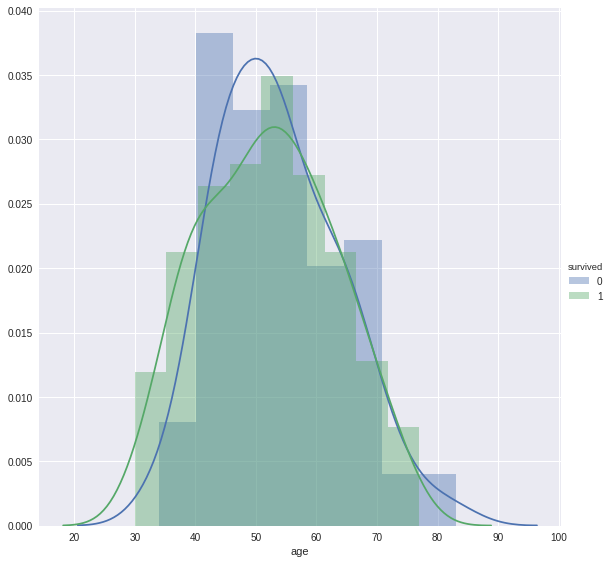

In [86]:
#ok lets try graphing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.FacetGrid(hd, hue ='survived', size = 8).map(sns.distplot, 'age').add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


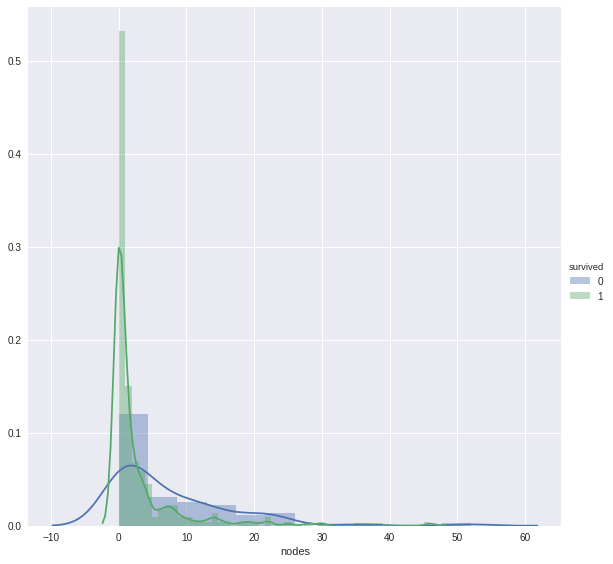

In [89]:

sns.FacetGrid(hd, hue ='survived', size = 8).map(sns.distplot, 'nodes').add_legend()
plt.show()


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


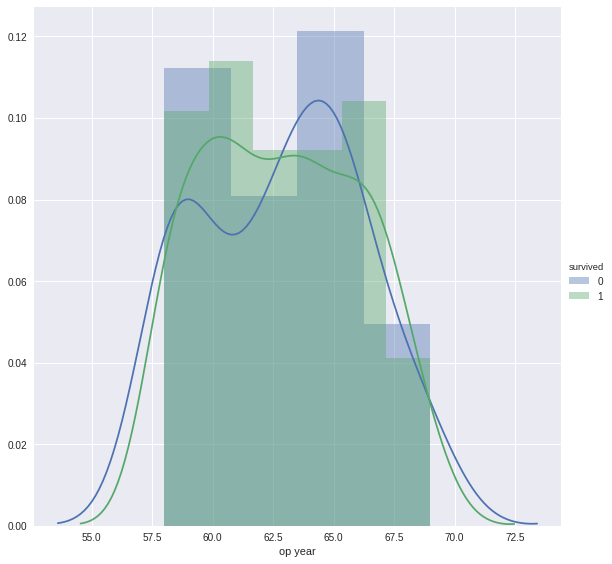

In [87]:
sns.FacetGrid(hd, hue ='survived', size = 8).map(sns.distplot, 'op year').add_legend()
plt.show()
  

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


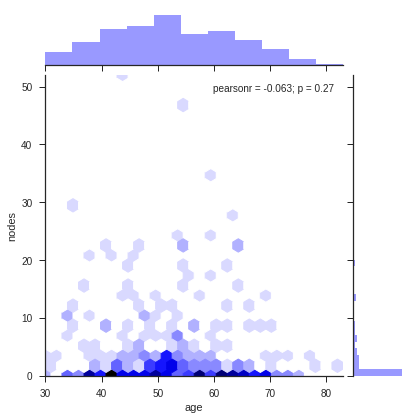

In [96]:


sns.jointplot(hd['age'],hd['nodes'], kind='hex', color='blue')


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

One feature that has a positive relationship with survival is age. In my first chart, the survival rate for patients aged thirty to forty is much higher than the rest of the patients. This is shown in the first KDE plot.

The number of nodes has a definite negative relationship with survival. This is clearly seen as the number of nodes increase past five. This is shown in the second KDE plot.

I don't clearly see how age and number of nodes are related, but I can say that the number of nodes drops off at around age seventy as shown in the hexbin plot.